<a href="https://colab.research.google.com/github/K-Himanshu/DataAnalysis/blob/main/Homesphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading the data now
df = pd.read_csv("/content/real_estate.csv")

In [3]:
#Let's briefly look at the data
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
# I do not want unwanted index, so I will set the Id as index. Also I see an unwanted column:I need to drop it
df= df.set_index('Id')
df.drop(['Unnamed: 0'], axis=1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [9]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

The problem statement is: Given a data point(That represents a house) with some features, can we predict the price?
Those features could be a combination of column names and the target variable here is 'SalePrice'

My intuition is to analyse the data first, see how the different features are related to SalePrice and then choose the features that fits best with this problem statement
I will go on to do linear, bivariate and multivariate analysis, look at the correlation of features with the target variable, and try to implement a bunch of algos including multiple linear regression, decision tree regressor and random forest and decide which algo fits the best

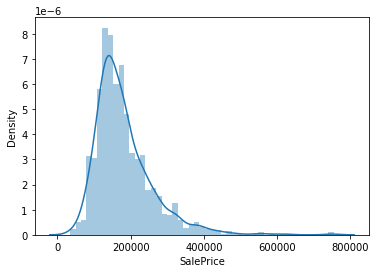

In [14]:
#I need to see how is the target variable distributed
sns.distplot(df['SalePrice']);

In [16]:
#skewness and kurtosis
# I know this is not a normal distribution, from the looks of it
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [17]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Mean(180921.195890) is right to the median(163000.000000), so it right skewed

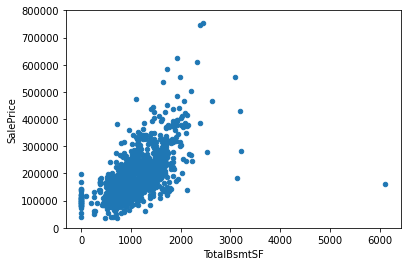

In [19]:
plot_data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
plot_data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

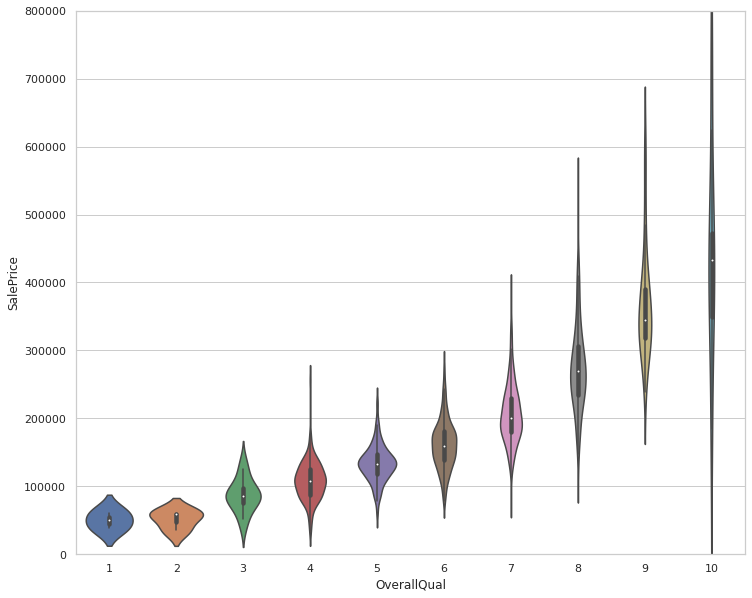

In [24]:
#Look at the overallquality. It is a categorical data--> A rating from 1 to 10.
# We will draw violin plot to see how does it relate to the sales price
sns.set_theme(style="whitegrid")
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.violinplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Woahh!!!
It's pretty obvious with the increase in overall quality, the sales prices incresases

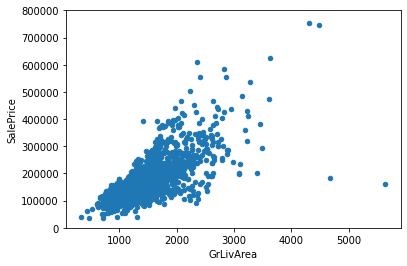

In [18]:
plot_data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
plot_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

Analysing like this one by one, could take much of our time, why not draw a pair plot instead?
Or, may be a heat map showing the correlation matrix

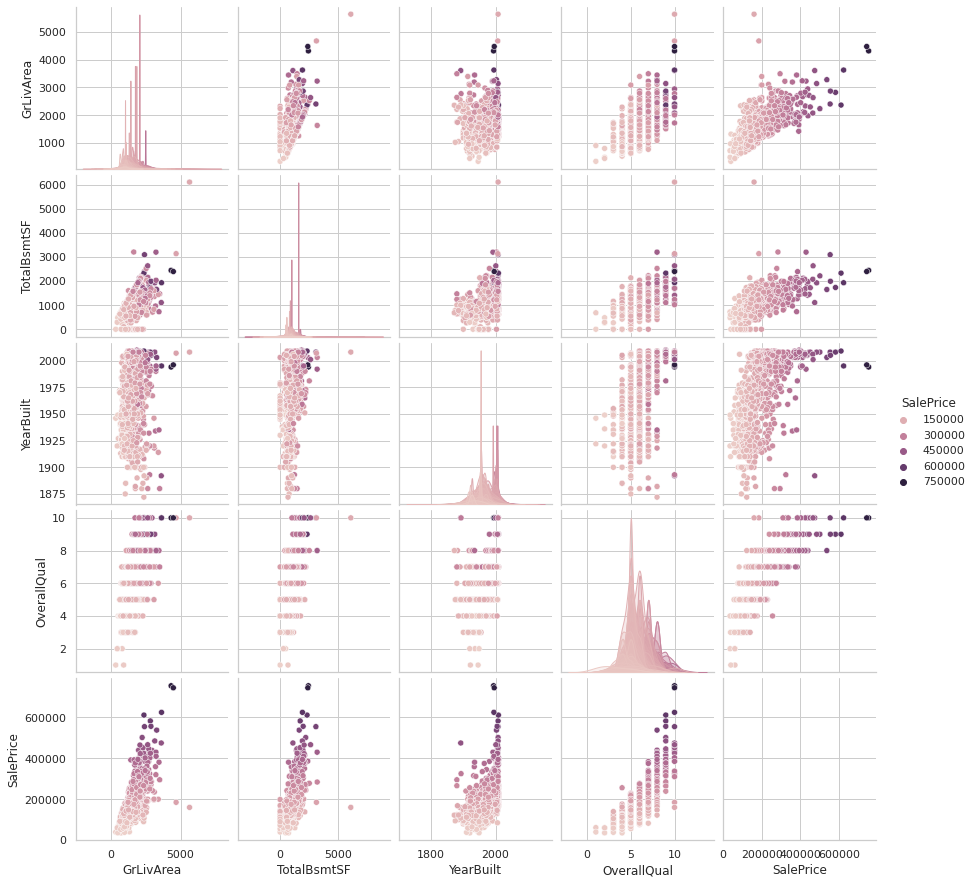

In [31]:
sns.pairplot(df,vars=['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'OverallQual','SalePrice'],hue="SalePrice")


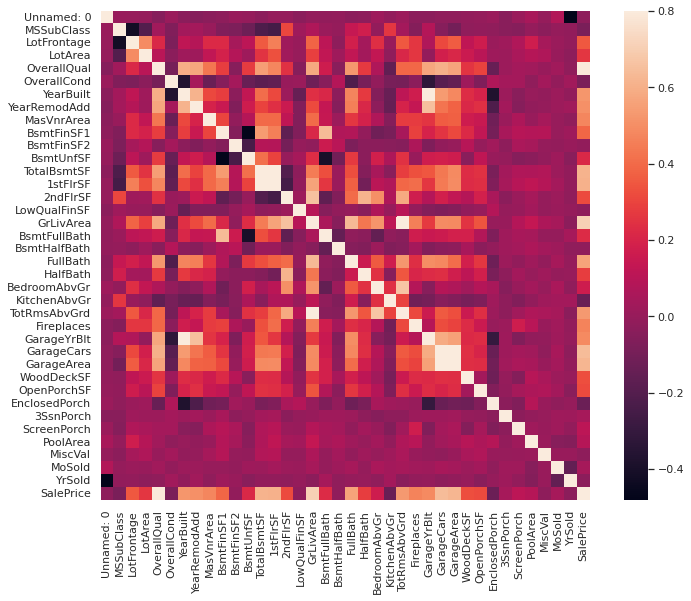

In [32]:
NewMat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(NewMat, vmax=.8, square=True);

Looking at the pairplot and heatmap,it is clear that the features to take into account are:
'TotRmsAbvGrd','FullBath','YearBuilt','GrLivArea','TotalBsmtSF','GrLivArea','1stFloor','GarageCars','GarageArea','OverallQual','GrLivArea','TotalBsmtSF'

In [33]:
# Cleaning the data now

#missing data
total = df.isnull().sum().sort_values(ascending=False)
print(total)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
HeatingQC          0
Length: 81, dtype: int64


In [36]:
# showing a summary of missing and percentage of missing data
per_cent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, per_cent], axis=1, keys=['TotalMiss', 'PercentMiss'])
missing_data.head()

,TotalMiss,PercentMiss
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829


In [38]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [39]:
for i in df.columns:
 df[i].fillna(df[i].mode()[0], inplace=True)

In [41]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)

Unnamed: 0     0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64


In [43]:
melbourne_features = ['TotRmsAbvGrd','FullBath','YearBuilt','GrLivArea','TotalBsmtSF','GrLivArea','GarageCars','GarageArea','OverallQual','GrLivArea','TotalBsmtSF']
X = df[melbourne_features]
y=df.SalePrice

In [46]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)
from sklearn.metrics import mean_absolute_error
# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


38069.536529680365


In [47]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
    TotRmsAbvGrd  FullBath  YearBuilt  GrLivArea  TotalBsmtSF  GrLivArea  \
Id                                                                         
1              8         2       2003       1710        856.0       1710   
2              6         2       1976       1262       1262.0       1262   
3              6         2       2001       1786        920.0       1786   
4              7         1       1915       1717        756.0       1717   
5              9         2       2000       2198       1145.0       2198   

    GarageCars  GarageArea  OverallQual  GrLivArea  TotalBsmtSF  
Id                                                               
1          2.0       548.0            7       1710        856.0  
2          2.0       460.0            6       1262       1262.0  
3          2.0       608.0            7       1786        920.0  
4          3.0       642.0            7       1717        756.0  
5          3.0       836

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

31498.811289356385


MAE for Random forest is lesser than Decision Tree Regressor
